# Fundamentals of Machine Learning - Exercise 2
### Deadline: 04.12.2020, 16:00

- Johannes Kammerer, Zhao Sun, Tong Yu


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
#display(Markdown(string))

#from sklearn.model_selection import ShuffleSplit
#from sklearn.model_selection import cross_validate

# 3. Data Preparation

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
data (1797, 64) images (1797, 8, 8) target (1797,) target_names (10,)
selecting 1&7 only: data (361, 64) target (361,)
X_train (216, 64) X_test (145, 64)


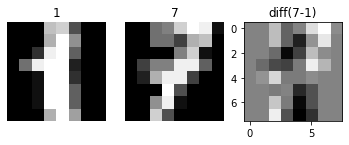

In [2]:
from sklearn . datasets import load_digits
from sklearn import model_selection

digits = load_digits()
print(digits.keys())
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]
print('data',data.shape, 'images',images.shape, 'target',target.shape, 'target_names',target_names.shape)

# Filter dataset for 1 and 7
data_select = data[np.logical_or(target==1, target ==7)]
target_select = target[(target==1)|(target ==7)]
print('selecting 1&7 only: data', data_select.shape, 'target',target_select.shape)  #(361, 64) (361,)

# Split dataset for #train/#test = 3/2
X_train, X_test, y_train , y_test = model_selection.train_test_split(data_select, target_select, train_size=0.6, random_state = 1, shuffle=True)
print('X_train', X_train.shape, 'X_test',X_test.shape)

# Visualize 7 and 1

one = images[target==1][0]
seven = images[target==7][0]
diff = seven - one
plt.subplot(1,3,1);plt.axis('off');plt.title('1');
plt.imshow(one,cmap='gray')
plt.subplot(1,3,2);plt.axis('off');plt.title('7');
plt.imshow(seven,cmap='gray')
plt.subplot(1,3,3);plt.title('diff(7-1)');
plt.imshow(diff,cmap='gray')

#a = np.arange(64).reshape(8,8)
#diff, a[diff>7], a[diff<-7]


## 3.1 Dimension Reduction (4 points)
Reduce the original 64 pixel values into 2 features

In [22]:
# print(np.arange(64).reshape(8,8))

def reduce_dim(x):
    '''
    x: a numpy array of size N × 64, where N is #instances  
    Returns reduced_x: numpy array of size shape N x 2
    
    Selected 2 features based on:
        # feature 1: the most prominent difference for 1 and 7 is probably the top part: first 2 rows position 2-6 and 10-14
        # feature 2: another distinguishing feature is vertical middle: position 43-45, 51-53,59-61
    '''
    feature1 = [2,3,4,5,6,10,11,12,13,14]
    feature2 = [43,44,45,51,52,53,59,60,61] #19,20, 27,28,35,36, 
    
    N = x.shape[0]
    reduced_x = np.zeros([N,2]) 
    
    reduced_x[:,0] = np.sum(x[:,feature1],axis=1)
    reduced_x[:,1] = np.sum(x[:,feature2],axis=1)
    
    return reduced_x


# reduce_dim(X_test[:10])


## 3.2 Scatterplot (4 points)
Visually inspect the distribution of the instances in the new feature space by means of a scatter plot


Text(0.5, 1.0, 'Distribution of Instances in Feature Space')

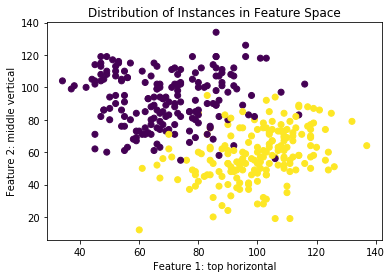

In [23]:
reduced_x = reduce_dim(data_select)

plt.scatter(x=reduced_x[:,0],y=reduced_x[:,1],c= target_select[:])
plt.xlabel("Feature 1: top horizontal"); plt.ylabel("Feature 2: middle vertical")
plt.title("Distribution of Instances in Feature Space")


# 4 Nearest Mean
## 4.1 Implement the nearest mean classifier (3 points)
Find the mean of the 2D feature vectors of each class in the training set and assign the label of its nearest mean to each test instance. 



In [24]:
def nearest_mean(training_features, training_labels, test_features):
    '''
    training_features and test_features are the outputs of reduce_dim() for training and test data respectively
    find the mean of the 2D feature vectors of each class in the training set and 
    assign the label of its nearest mean to each test instance
    '''
    #N = test_features.shape[0]
    #predicted_labels = np.zero(N)
    
    means = []
    labels = np.unique(training_labels)
    
    for label in labels:
        mean = np.mean(training_features[training_labels == label],axis=0)
        means.append(mean)
    
    train_means = np.array(means)
    
    dist = np.linalg.norm((train_means[:,None,:] - test_features[None,:,:]), axis=2)
    indices = np.argsort(dist, axis = 0)[0]
    
    #print(labels, train_means, indices)
    
    predicted_labels = labels[indices] 
    
    return predicted_labels



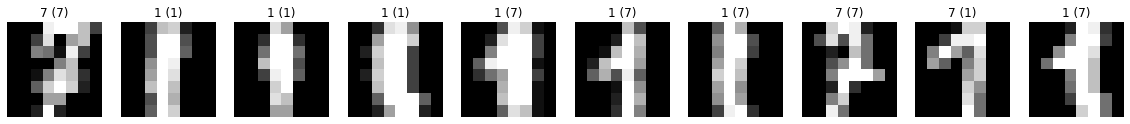

In [25]:
X_train_features = reduce_dim(X_train)
X_test_features = reduce_dim(X_test)

predicted_labels = nearest_mean(X_train_features, y_train, X_test_features)

X_train, X_test, y_train , y_test

x = 50
fig,ax = plt.subplots(1,10,squeeze=True,figsize=[20,5])
for i in range(10):
    ax[i].imshow(X_test[x+i].reshape(8,8),cmap='gray')
    ax[i].set_title("{} ({})".format(predicted_labels[x+i], y_train[x+i]))
    ax[i].axis('off')
    

## 4.2 Visualize the decision regions (4 points)
An image of the decision regions - create a grid where each pixel position represents a feature coordinate, and the pixel is colored with the corresponding predicted class label

Text(0, 0.5, 'Feature 2: middle vertical')

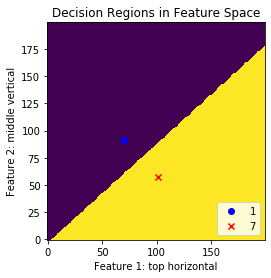

In [26]:
x = np.linspace(0, 200, 200,endpoint=False, dtype=int)
xx, yy = np.meshgrid(x, x)

grid_features = np.stack([xx, yy],axis = 2).reshape(-1,2) #need to reshape it to vector

grid_predictions = nearest_mean(X_train_features, y_train, grid_features)

plt.imshow(grid_predictions.reshape(200,200),origin='lower')

means = []
for label in [1,7]:
    mean = np.mean(X_train_features[y_train == label],axis=0)
    means.append(mean)
    
train_means = np.array(means)

# plt.scatter(train_means[:,0],train_means[:,1],color=['blue','red'],label=[1,7]); plt.legend() # legend does not work this way

for i in range(2):
    plt.scatter(train_means[i,0], train_means[i,1], c = ['blue','red'][i], label = [1,7][i], marker=['o','x'][i])

    plt.legend(loc = 'lower right')
plt.title("Decision Regions in Feature Space")
plt.xlabel("Feature 1: top horizontal"); plt.ylabel("Feature 2: middle vertical")



# 5 QDA
## 5.1 Implement QDA Training (6 points)

In [27]:
def fit_qda(training_features, training_labels):
    ''' INPUTS:
        training_features: N × D matrix,
        training_labels: N-dimensional vector, where N is the total number of training instances,
        The label vector should use label 0 to indicate digit 1 and label 1 to indicate digit 7.
        
        OUTPUT:
        mu: 2×D matrix whose rows are the two class means,
        covmat: 2× D×D array containing the two covariance matrices, 
        p: vector containing the two priors
        '''
    N, D = training_features.shape
    class_labels, class_counts = np.unique(training_labels, return_counts = True)
    n = len(class_labels)

    # class means for all features
    mu = np.zeros([n,D])
    covmat = np.zeros([n,D,D])
    p = np.zeros([n])
    
    for i in range(n):
        mu[i] = training_features[training_labels == class_labels[i]].mean(axis =0)
       
        x = training_features[training_labels == class_labels[i]] - mu[i]
       
        covmat[i,:,:] = np.multiply(x[:,None,:],x[:,:,None]).mean(axis=0)
        
        p[i] = class_counts[i] / N
    
    # prior p(y=k) = Nk / N
    #p = np.unique(training_labels, return_counts = True)[1] / N

    return mu, covmat, p


In [28]:
mu, covmat, p = fit_qda(X_train_features, y_train)

print('mu = \n{}, \n\ncovmat = \n{}, \n\np = \n{}'.format(mu, covmat, p))

mu = 
[[ 70.28301887  91.60377358]
 [101.08181818  57.66363636]], 

covmat = 
[[[232.44820221 -11.72748309]
  [-11.72748309 265.99394802]]

 [[196.60239669  97.83661157]
  [ 97.83661157 287.7868595 ]]], 

p = 
[0.49074074 0.50925926]


## 5.2 Implement QDA Prediction (3 points)

In [29]:
def predict_qda(mu, covmat, p, test_features):
    """
    INPUTS:
    test_features: M × D matrix of test instances
    
    OUTPUTS:
    predicted_labels: M x 1 vector
    """
    #print(test_features.shape, mu.shape)
    #print((test_features - mu[0]).shape, np.linalg.inv(covmat[0]).shape)

    n, D = mu.shape
    M = test_features.shape[0]
    
    #test_features = np.repeat(test_features[None,:,:],n,axis=0)
    #print((test_features - mu[:,None,:]).shape)
    
    #sq_Mahalanobis_dist = ((test_features - mu[:,None,:]).dot(np.linalg.inv(covmat))).dot((test_features - mu[:,None,:]))
    #print(sq_Mahalanobis_dist.shape)
        
    out = np.zeros([n,M])
    for i in range(n):
        sq_Mahalanobis_dist = ((test_features - mu[i]).dot(np.linalg.inv(covmat[i]))).dot((test_features - mu[i]).T).sum(axis=0)
        out[i] = sq_Mahalanobis_dist
    
    labels = np.array([1,7])
    predicted_labels = labels[np.argmin(out,axis=0)]

    return predicted_labels


def error_rate(true_labels, predicted_labels):
    return np.sum(true_labels != predicted_labels) / len(true_labels)


In [30]:
predicted_test = predict_qda(mu, covmat, p, X_test_features)

predicted_train = predict_qda(mu, covmat, p, X_train_features)

error_test = error_rate(y_test, predicted_test)

error_train = error_rate(y_train, predicted_train)


print('Training error rate: {:2.2%} \nTest error rate: {:2.2%}'.format(error_train,error_test))


Training error rate: 6.02% 
Test error rate: 13.10%


## 5.3 Visualization (5 points)

In [31]:
x = np.linspace(0, 200, 200,endpoint=False, dtype=int)
xx, yy = np.meshgrid(x, x)
grid = np.dstack((xx, yy)) 

predictions = predict_qda(mu, covmat, p, grid.reshape(-1,2)) #need to reshape it to vector
grid_predictions = predictions.reshape(200,200)

from scipy.stats import multivariate_normal

gaussian = []

for i in range(2):
    rv = multivariate_normal(mu[i], covmat[i])
    gaussian.append(rv.pdf(grid))


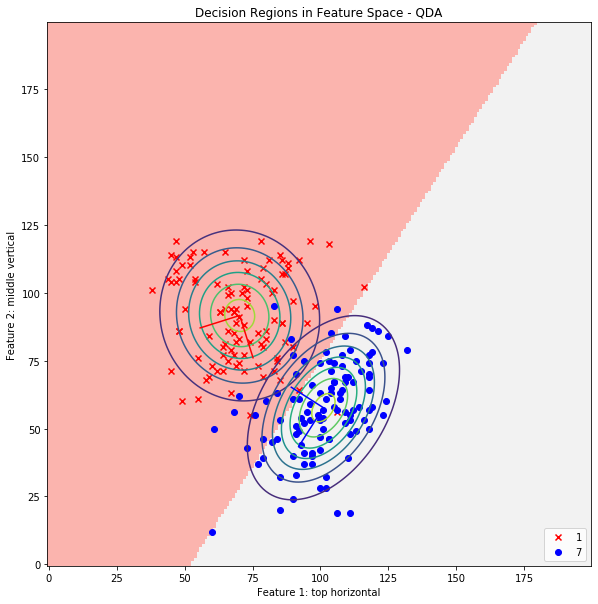

In [32]:
fig, ax = plt.subplots(figsize = (20,10))

ax.imshow(grid_predictions,origin='lower',cmap='Pastel1')

labels = [1,7]
colors =['red','blue']
markers=['x','o']
for i in range(2):
    ax.scatter(X_train_features[y_train==labels[i]][:,0], X_train_features[y_train==labels[i]][:,1], c = colors[i], label = labels[i], marker=markers[i])
    ax.contour(xx, yy, gaussian[i])

ax.legend(loc = 'lower right')    
ax.set_title("Decision Regions in Feature Space - QDA")
ax.set_xlabel("Feature 1: top horizontal")
ax.set_ylabel("Feature 2: middle vertical")

# Eigenvalue/Eigenvector decomposition of the two covariance matrices

for i in range(2):
    lambda_, v = np.linalg.eig(covmat[i])
    v0 = v[:, 0]*np.sqrt(covmat[i,0,0]) + mu[i]
    v1 = v[:, 1]*np.sqrt(covmat[i,1,1]) + mu[i]
    p = np.vstack([v0,mu[i],v1])
    ax.plot(p[:,0],p[:,1],c=colors[i])
    

Use this plot and your estimated training error to rate the quality of the QDA results on the training data. 

**OBSERVATIONS:** the training data does not fit neatly as two clusters in the shape of ellipsoids. There are a lot of 'outliers' which contribute to misclassification and hence relatively large training errors. 

## 5.4 Performance evaluation (3 points)

In [33]:
# Apply 10-fold cross validation to the QDA classifier

from sklearn.model_selection import KFold

def evaluate_qda(data_select, target_select, k):
    
    X_feature = reduce_dim(data_select)
    kf = KFold(n_splits=k)
    errors = []

    for train_index, test_index in kf.split(X_feature):

        X_train, X_test = X_feature[train_index], X_feature[test_index]
        y_train, y_test = target_select[train_index], target_select[test_index]

        mu, covmat, p = fit_qda(X_train, y_train)
        predicted_test = predict_qda(mu, covmat, p, X_test)
        error = error_rate(y_test, predicted_test)
        errors.append(error)

    return np.array(errors)

errors = evaluate_qda(data_select, target_select, k=10)

print("Error rate from 10-fold Cross Validation_QDA: {:2.2%} +/- {:2.2%}".format(errors.mean(), errors.std()))


from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

clf = QuadraticDiscriminantAnalysis()
scores = cross_val_score(clf, data_select, target_select, cv=10) #When the cv argument is an integer, cross_val_score uses the KFold or StratifiedKFold strategies by default, the latter being used if the estimator derives from ClassifierMixin.

print("-"*50,"\nComparing with sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()")
#print("Accuracy from 10-fold Cross Validation: {:2.2%} +/- {:2.2%}".format(scores.mean(), scores.std() * 2))
print("Error rate from 10-fold Cross Validation_QDA: {:2.2%} +/- {:2.2%}".format((1-scores).mean(), (1-scores).std()))



Error rate from 10-fold Cross Validation_QDA: 10.20% +/- 7.70%
-------------------------------------------------- 
Comparing with sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
Error rate from 10-fold Cross Validation_QDA: 2.50% +/- 2.90%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\ProgramData\Anaconda3\lib\site-

# 6 LDA (8 points)

Repeat all tasks of assignment 5 for LDA, i.e. implement functions fit_lda() and predict_lda(),
apply them to your data, visualize the decision boundary with overlays for training points and
cluster shape, and perform performance evaluation. How does the prediction quality change relative
to QDA and the nearest mean classifier?

In [34]:
def fit_LDA(training_features, training_labels):
    ''' INPUTS:
        training_features: N × D matrix,
        training_labels: N-dimensional vector, where N is the total number of training instances,
        The label vector should use label 0 to indicate digit 1 and label 1 to indicate digit 7.
        
        OUTPUT:
        mu: 2×D matrix whose rows are the two class means,
        covmat: D×D array containing the covariance matrix (same across all classe), 
        p: vector containing the two priors
        '''
    N, D = training_features.shape
    class_labels, class_counts = np.unique(training_labels, return_counts = True)
    n = len(class_labels)

    mu = np.zeros([n,D])
    covmat = np.zeros([D,D])
    p = np.zeros([n])
    
    # class means for all features -- IS THERE A BETTER NUMPY WAY OF DOING THIS WIHTOUT LOOP??
    for i in range(n):
        mu[i] = training_features[training_labels == class_labels[i]].mean(axis =0)       
    
    # covariance matrix of the the entire dataset
    covmat = np.cov(training_features.T)

    # prior p(y=k) = Nk / N
    p = np.unique(training_labels, return_counts = True)[1] / N

    return mu, covmat, p


mu_LDA, covmat_LDA, p_LDA = fit_LDA(X_train_features, y_train)
print('mu_LDA = \n{}, \n\ncovmat_LDA = \n{}, \n\np_LDA = \n{}'.format(mu, covmat, p))

mu_LDA = 
[[ 70.28301887  91.60377358]
 [101.08181818  57.66363636]], 

covmat_LDA = 
[[[232.44820221 -11.72748309]
  [-11.72748309 265.99394802]]

 [[196.60239669  97.83661157]
  [ 97.83661157 287.7868595 ]]], 

p_LDA = 
[[ 89.2571474   65.19885751]
 [101.08181818  57.66363636]
 [ 91.96513047  43.35724392]]


In [35]:
def predict_LDA(mu, covmat, p, test_features):
    """
    INPUTS:
    test_features: M × D matrix of test instances
    
    OUTPUTS:
    predicted_labels: M x 1 vector
    """
    n, D = mu.shape
    M = test_features.shape[0]
    out = np.zeros([n,M])
    
    for i in range(n):
        out[i,:] = np.dot( np.dot(mu[i].T,np.linalg.inv(covmat)), test_features.T) 
    
    labels = np.array([1,7])
    predicted_labels = labels[np.argmax(out,axis=0)]

    return predicted_labels


predicted_test_LDA = predict_LDA(mu_LDA, covmat_LDA, p_LDA, X_test_features)
predicted_train_LDA = predict_LDA(mu_LDA, covmat_LDA, p_LDA, X_train_features)
error_test_LDA = error_rate(y_test, predicted_test_LDA)
error_train_LDA = error_rate(y_train, predicted_train_LDA)

print('Training error rate_LDA: {:2.2%} \nTest error rate_LDA: {:2.2%}'.format(error_train_LDA,error_test_LDA))


Training error rate_LDA: 16.20% 
Test error rate_LDA: 15.17%


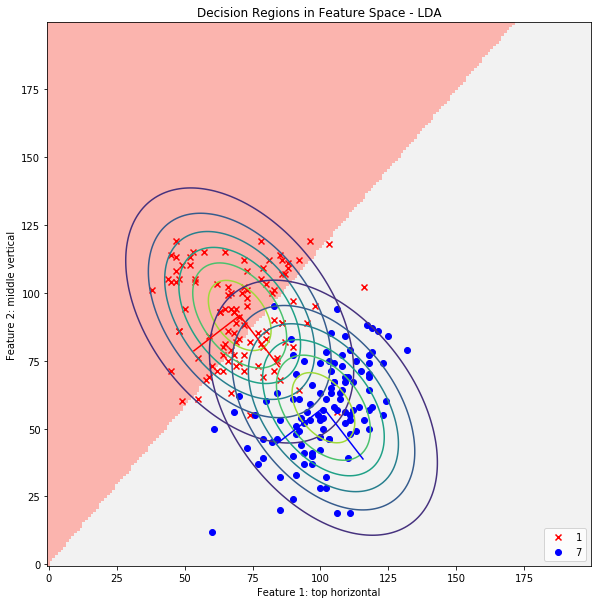

In [36]:
x = np.linspace(0, 200, 200,endpoint=False, dtype=int)
xx, yy = np.meshgrid(x, x)
grid = np.dstack((xx, yy)) 

predictions_LDA = predict_LDA(mu_LDA, covmat_LDA, p_LDA, grid.reshape(-1,2)) #need to reshape it to vector
grid_predictions_LDA = predictions_LDA.reshape(200,200)

from scipy.stats import multivariate_normal

gaussian_LDA = []

for i in range(2):
    rv = multivariate_normal(mu_LDA[i], covmat_LDA)
    gaussian_LDA.append(rv.pdf(grid))

fig, ax = plt.subplots(figsize = (20,10))

ax.imshow(grid_predictions_LDA, origin='lower', cmap='Pastel1')

labels = [1,7]
colors =['red','blue']
markers=['x','o']
for i in range(2):
    ax.scatter(X_train_features[y_train==labels[i]][:,0], X_train_features[y_train==labels[i]][:,1], c = colors[i], label = labels[i], marker=markers[i])
    ax.contour(xx, yy, gaussian_LDA[i])

ax.legend(loc = 'lower right')    
ax.set_title("Decision Regions in Feature Space - LDA")
ax.set_xlabel("Feature 1: top horizontal")
ax.set_ylabel("Feature 2: middle vertical")

# Eigenvalue/Eigenvector decomposition of the two covariance matrices

for i in range(2):
    lambda_, v = np.linalg.eig(covmat_LDA)
    v0 = v[:, 0]*np.sqrt(covmat_LDA[0,0]) + mu_LDA[i]
    v1 = v[:, 1]*np.sqrt(covmat_LDA[1,1]) + mu_LDA[i]
    pts = np.vstack([v0,mu_LDA[i],v1])
    ax.plot(pts[:,0],pts[:,1],c=colors[i])
    

In [37]:
# Apply 10-fold cross validation to the LDA classifier

from sklearn.model_selection import KFold

def evaluate_LDA(data_select, target_select, k):
    
    X_feature = reduce_dim(data_select)
    kf = KFold(n_splits=k)
    errors = []

    for train_index, test_index in kf.split(X_feature):

        X_train, X_test = X_feature[train_index], X_feature[test_index]
        y_train, y_test = target_select[train_index], target_select[test_index]

        mu, covmat, p = fit_LDA(X_train, y_train)
        predicted_test = predict_LDA(mu, covmat, p, X_test)
        error = error_rate(y_test, predicted_test)
        errors.append(error)

    return np.array(errors)

errors = evaluate_LDA(data_select, target_select, k=10)

print("Error rate from 10-fold Cross Validation_LDA: {:2.2%} +/- {:2.2%}".format(errors.mean(), errors.std()))



from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

clf = LinearDiscriminantAnalysis()
scores = cross_val_score(clf, data_select, target_select, cv=10) #When the cv argument is an integer, cross_val_score uses the KFold or StratifiedKFold strategies by default, the latter being used if the estimator derives from ClassifierMixin.

print("-"*50,"\nComparing with sklearn.discriminant_analysis.LinearDiscriminantAnalysis()")
#print("Accuracy from 10-fold Cross Validation_LDA: {:2.2%} +/- {:2.2%}".format(scores.mean(), scores.std()))
print("Error rate from 10-fold Cross Validation_LDA: {:2.2%} +/- {:2.2%}".format((1-scores).mean(), (1-scores).std()))

#print("Observations: The accuracy of LDA is higher than QDA.")

Error rate from 10-fold Cross Validation_LDA: 8.33% +/- 7.03%
-------------------------------------------------- 
Comparing with sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
Error rate from 10-fold Cross Validation_LDA: 1.11% +/- 2.55%
